In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tensorflow.keras.optimizers import Adam

### ***Pyforest automatically import most used libraries which reduces the repititive tasks performed while coding***

In [3]:
from pyforest import *
lazy_imports()

['from openpyxl import load_workbook',
 'import plotly as py',
 'import plotly.express as px',
 'import xgboost as xgb',
 'from pyspark import SparkContext',
 'import datetime as dt',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.ensemble import RandomForestClassifier',
 'import glob',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.model_selection import train_test_split',
 'import spacy',
 'import matplotlib.pyplot as plt',
 'import sys',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import lightgbm as lgb',
 'import dash',
 'from pathlib import Path',
 'import keras',
 'import os',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.manifold import TSNE',
 'import awswrangler as wr',
 'import tqdm',
 'import altair as alt',
 'import sklearn',
 'import gensim',
 'import nltk',
 'import pickle',
 'import bokeh',
 'import plotly.graph_objs as go',
 'import tensorflow as tf',
 'import seaborn as sn

In [5]:
# load dataset
df = pd.read_csv("Mining Floatation.csv",
                 decimal=",",parse_dates=["date"], infer_datetime_format=True)

<IPython.core.display.Javascript object>

In [6]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [7]:
df.tail()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71
737452,2017-09-09 23:00:00,49.75,23.2,1164.12,468.019,384.801,9.61497,1.65310,300.355,292.865,...,308.115,413.754,514.143,881.323,378.969,500.100,374.354,441.182,64.27,1.71


In [8]:
df.shape

(737453, 24)

In [9]:
df = df.drop_duplicates()
print(df.shape)

(736282, 24)


In [10]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, df['% Silica Concentrate'], test_size=0.2, random_state = 42)

<IPython.core.display.Javascript object>

### **Preparing the data with input and target features**

In [12]:
X_train.drop(labels=['% Iron Feed',"Flotation Column 03 Air Flow",'date','% Silica Concentrate','% Iron Concentrate'], axis=1, inplace=True)
X_train.head()

/Users/shreyassk/PycharmProjects/MLOps_Iron_Concentration/venv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
195954,24.52,2721.59,477.792,398.482000,10.12400,1.74746,249.860,251.179,300.125000,300.743000,302.091,294.346,459.976,441.275,443.711,337.734,356.930,329.194,342.636
660499,19.28,3328.11,550.397,378.610455,9.52659,1.72337,299.321,295.866,299.325000,302.179000,303.099,299.536,486.994,503.141,596.259,410.657,328.833,421.932,301.693
576340,23.16,435.93,422.775,376.556000,9.83983,1.62716,299.831,302.839,305.424500,290.718011,341.385,349.589,408.149,314.147,410.401,378.323,384.786,354.624,397.927
229955,6.26,3139.05,422.172,405.586000,9.40286,1.57398,249.575,249.789,299.927000,297.909000,300.483,300.202,447.685,449.022,175.838,340.965,339.674,346.608,336.231
707324,16.60,3649.94,476.304,376.449000,9.52914,1.73797,299.891,298.467,295.262129,292.038294,361.733,346.657,579.866,511.847,391.917,395.390,419.427,327.757,333.770


In [13]:
X_test.drop(labels=[ '% Iron Feed',"Flotation Column 03 Air Flow",'date','% Silica Concentrate','% Iron Concentrate'], axis=1, inplace=True)
X_test.head()

/Users/shreyassk/PycharmProjects/MLOps_Iron_Concentration/venv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
125925,14.35,1808.17,441.197,396.862000,9.48686,1.59560,250.478,246.366,303.027543,300.497378,250.290,256.01300,598.942,598.261,600.160,243.156,355.232,383.510,373.567
258592,6.26,3533.51,447.644,399.085000,10.25880,1.67029,301.380,325.117,299.888000,299.569000,300.798,299.92300,442.844,452.040,435.390,381.055,368.977,361.153,418.177
695481,24.90,2527.44,484.740,384.751000,8.95432,1.60299,298.582,300.801,299.235853,301.323536,359.955,353.83775,405.126,416.465,415.270,330.677,334.797,336.214,355.672
727423,15.79,3448.49,556.811,413.453774,9.37545,1.64578,299.268,298.905,302.660443,304.164656,344.921,324.69400,391.169,526.111,395.834,347.156,352.536,342.797,334.247
443007,12.85,3283.95,440.219,396.885000,9.82755,1.55608,300.755,302.027,299.774000,300.658000,306.799,307.70000,402.207,400.213,385.540,366.088,388.954,392.092,428.830


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_arr = scaler.fit_transform(X_train)
X_test_arr = scaler.fit_transform(X_test)

In [15]:
X_train.shape, X_test.shape

((589025, 19), (147257, 19))

In [16]:
X_train_df = pd.DataFrame(X_train_arr, columns = X_train.columns)
X_test_df = pd.DataFrame(X_test_arr, columns = X_test.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
X_train_df.head()

,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,1.447431,-0.121605,-0.113757,0.094220,0.921005,0.968670,-1.020316,-0.859397,0.264630,0.227886,0.332550,0.126638,-0.458713,-0.633790,-0.579951,-0.899143,-0.807610,-1.119951,-0.921884
1,0.678626,0.376903,0.681720,-1.953764,-0.620984,0.620640,0.648303,0.622373,-0.046215,0.622496,0.365873,0.307486,-0.252458,-0.151382,0.430712,-0.103984,-1.140322,-0.088570,-1.404004
2,1.247894,-2.000226,-0.716536,-2.165498,0.187527,-0.769315,0.665509,0.853589,2.323787,-2.526966,1.631572,2.051608,-0.854359,-1.625087,-0.800637,-0.456557,-0.477753,-0.837133,-0.270810
3,-1.231649,0.221512,-0.723142,0.826366,-0.940346,-1.537612,-1.029931,-0.905488,0.187696,-0.550893,0.279391,0.330693,-0.552542,-0.573382,-2.354666,-0.863912,-1.011948,-0.926282,-0.997305
4,0.285420,0.641420,-0.130060,-2.176526,-0.614402,0.831567,0.667533,0.708619,-1.624872,-2.164154,2.304257,1.949441,0.456524,-0.083496,-0.923097,-0.270457,-0.067550,-1.135933,-1.026285


### **Neural Network Model**

In [18]:
def NNmodel():
    model = Sequential()
    model.add(Dense(50, input_dim=19, kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=0.1))
    #model.add(Dropout(0.25))
    model.add(Dense(50, kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=0.1))
    #model.add(Dropout(0.25))
    model.add(Dense(50, kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=0.1))
    #model.add(Dropout(0.25))
    model.add(Dense(50, kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=0.1))
    #model.add(Dropout(0.25))
    model.add(Dense(50, kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=0.1))
    #model.add(Dropout(0.25))
    model.add(Dense(50, kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=0.1))
    #model.add(Dropout(0.25))
    model.add(Dense(50, kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    opt = Adam(lr = 0.0008)

    model.compile(loss='mean_squared_error', optimizer = opt, metrics=['mse','mae'])
    return model

# Fit the model
clf = KerasRegressor(build_fn = NNmodel, epochs=50, validation_split = 0.2, batch_size=40, verbose = 2)
clf.fit(X_train_df,y_train)


Train on 471220 samples, validate on 117805 samples
Epoch 1/50
471220/471220 - 16s - loss: 0.8672 - mse: 0.8672 - mae: 0.7112 - val_loss: 0.7203 - val_mse: 0.7203 - val_mae: 0.6402
Epoch 2/50
471220/471220 - 16s - loss: 0.6653 - mse: 0.6653 - mae: 0.6091 - val_loss: 0.6053 - val_mse: 0.6053 - val_mae: 0.5822
Epoch 3/50
471220/471220 - 16s - loss: 0.5822 - mse: 0.5822 - mae: 0.5606 - val_loss: 0.5470 - val_mse: 0.5470 - val_mae: 0.5380
Epoch 4/50
471220/471220 - 15s - loss: 0.5328 - mse: 0.5328 - mae: 0.5310 - val_loss: 0.5075 - val_mse: 0.5075 - val_mae: 0.5208
Epoch 5/50
471220/471220 - 15s - loss: 0.4974 - mse: 0.4974 - mae: 0.5092 - val_loss: 0.4757 - val_mse: 0.4757 - val_mae: 0.4918
Epoch 6/50
471220/471220 - 15s - loss: 0.4715 - mse: 0.4715 - mae: 0.4933 - val_loss: 0.4830 - val_mse: 0.4830 - val_mae: 0.4905
Epoch 7/50
471220/471220 - 15s - loss: 0.4496 - mse: 0.4496 - mae: 0.4797 - val_loss: 0.4497 - val_mse: 0.4497 - val_mae: 0.4819
Epoch 8/50
471220/471220 - 15s - loss: 0.4303

147257/147257 - 2s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

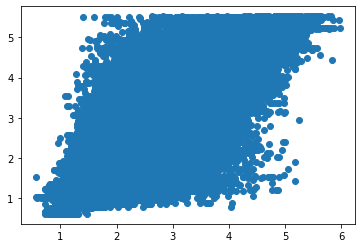

0.6930380539959816
0.28473346812412553


In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred = clf.predict(X_test_df)
plt.scatter(y_pred, y_test)
plt.show()

print(r2_score(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))

In [38]:
keras.models.save_model(filepath='/Users/shreyassk/m.h5', model=clf.model)
def save_model(model):
    # saving model
    json_model = model.to_json()
    open('model_architecture.json', 'w').write(json_model)
    # saving weights
    model.save_weights('model_weights.h5', overwrite=True)

def load_model():
    # loading model
    model = model_from_json(open('model_architecture.json').read())
    model.load_weights('model_weights.h5')
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

<IPython.core.display.Javascript object>

AttributeError: module 'tensorflow' has no attribute 'get_default_session'

In [4]:
import eli5
from eli5.sklearn import PermutationImportance

Using TensorFlow backend.


In [21]:
perm = PermutationImportance(clf, random_state=42).fit(X_train_df,y_train)
eli5.show_weights(perm, feature_names = X_train_df.columns.tolist())

589025/589025 - 8s - loss: 0.2670 - mse: 0.2670 - mae: 0.3585
589025/589025 - 8s - loss: 1.1989 - mse: 1.1989 - mae: 0.7876
589025/589025 - 8s - loss: 0.4583 - mse: 0.4583 - mae: 0.4616
589025/589025 - 8s - loss: 0.9548 - mse: 0.9548 - mae: 0.6925
589025/589025 - 8s - loss: 0.3744 - mse: 0.3744 - mae: 0.4212
589025/589025 - 8s - loss: 0.9480 - mse: 0.9480 - mae: 0.6840
589025/589025 - 9s - loss: 0.8102 - mse: 0.8102 - mae: 0.6270
589025/589025 - 9s - loss: 0.9719 - mse: 0.9719 - mae: 0.6715
589025/589025 - 10s - loss: 0.4892 - mse: 0.4892 - mae: 0.4778
589025/589025 - 9s - loss: 0.5831 - mse: 0.5831 - mae: 0.5176
589025/589025 - 9s - loss: 0.4585 - mse: 0.4585 - mae: 0.4589
589025/589025 - 9s - loss: 0.5358 - mse: 0.5358 - mae: 0.5023
589025/589025 - 9s - loss: 0.3717 - mse: 0.3717 - mae: 0.4223
589025/589025 - 9s - loss: 0.8141 - mse: 0.8141 - mae: 0.6235
589025/589025 - 9s - loss: 0.5864 - mse: 0.5864 - mae: 0.5276
589025/589025 - 9s - loss: 0.7519 - mse: 0.7519 - mae: 0.5992
589025/

Weight,Feature
0.9340 ± 0.0054,% Silica Feed
0.7033 ± 0.0020,Flotation Column 01 Air Flow
0.6890 ± 0.0034,Amina Flow
0.6790 ± 0.0046,Ore Pulp pH
0.5463 ± 0.0018,Flotation Column 01 Level
0.5425 ± 0.0020,Ore Pulp Density
0.4846 ± 0.0029,Flotation Column 03 Level
0.3188 ± 0.0027,Flotation Column 02 Level
0.3170 ± 0.0021,Flotation Column 04 Air Flow
0.2683 ± 0.0008,Flotation Column 06 Air Flow


In [22]:
from fairml import audit_model
from fairml import plot_dependencies

     | 7.5 MB 535 kB/s
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Created wheel for fairml: filename=fairml-0.1.1.5-py3-none-any.whl size=9452 sha256=53479f0d58c90d13f0aad7a5b160c717f53b68a017750068257ac15a6408d835
  Stored in directory: /private/var/folders/82/d5zrv95d77z7k02qb9hmvn080000gn/T/pip-ephem-wheel-cache-5wysnbrp/wheels/42/bd/5d/2499f7ddb98ec90205117f41bb0cd7fbae97922bacd6a4fe24
Successfully built fairml


In [23]:
total, _ = audit_model(clf.predict, X_test_df)

# print feature importance
print(total)

10/10 - 0s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
147257/147257 - 2s
1

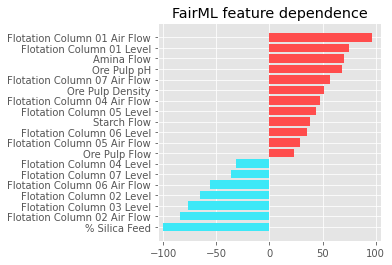

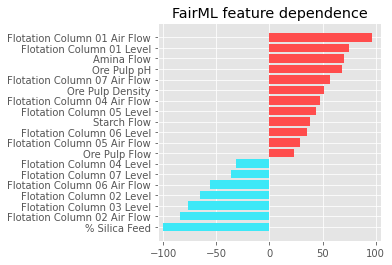

In [24]:
# generate feature dependence plot
plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML feature dependence",
)